In [2]:
from __future__ import print_function, division
import numpy as np
import nsfg
import thinkstats2
import thinkplot
import scipy.stats

In [3]:
## Homework 3 (Due Date 08.05.2018 23:59)
resp = nsfg.ReadFemResp()

In [27]:
# Question 1 - 2/2
clean_data = resp.dropna(subset=['timesmar', 'jintendn'])
timesmar = clean_data.timesmar
timesmar_mean, timesmar_std = timesmar.mean(), timesmar.std()
jintendn = clean_data.jintendn
jintendn_mean, jintendn_std = jintendn.mean(), jintendn.std()
print("jintendn mean/std values: ", jintendn_mean,"/", jintendn_std)
print("timesmar mean/std values: ", timesmar_mean,"/", timesmar_std)

jintendn mean/std values:  2.712290502793296 / 9.859218618451202
timesmar mean/std values:  1.0865921787709498 / 0.3215568595995843


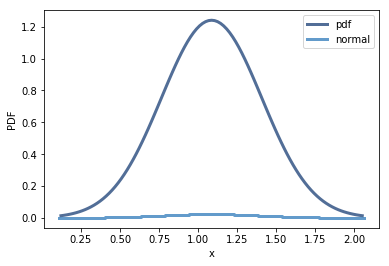

In [28]:
# Question 2 - 1/2
timesmar_pdf = thinkstats2.NormalPdf(timesmar_mean, timesmar_std)
thinkplot.Pdf(timesmar_pdf, label='pdf')
thinkplot.Config(xlabel='x', ylabel='PDF')

timesmar_pmf = timesmar_pdf.MakePmf()
thinkplot.Pmf(timesmar_pmf, label='normal')
thinkplot.Config(xlabel='x', ylabel='PDF')

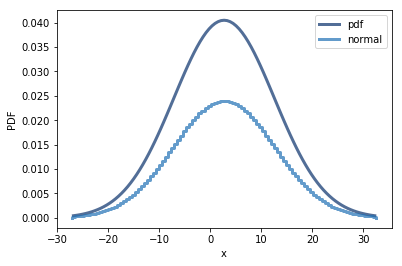

In [29]:
# Question 2 - 2/2
jintendn_pdf = thinkstats2.NormalPdf(jintendn_mean, jintendn_std)
thinkplot.Pdf(jintendn_pdf, label='pdf')
thinkplot.Config(xlabel='x', ylabel='PDF')

jintendn_pmf = jintendn_pdf.MakePmf()
thinkplot.Pmf(jintendn_pmf, label='normal')
thinkplot.Config(xlabel='x', ylabel='PDF')

In [30]:
# Question 3 1/2
def RawMoment(xs, k):
    return sum(x**k for x in xs) / len(xs)
def Mean(xs):
    return RawMoment(xs, 1)
def CentralMoment(xs, k):
    mean = RawMoment(xs, 1)
    sum_list = [(x - mean)**k for x in xs]
    return sum(sum_list) / len(sum_list)
def StandardizedMoment(xs, k):
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    return CentralMoment(xs, k) / std**k
def Skewness(xs):
    return StandardizedMoment(xs, 3)
def Median(xs):
    cdf = thinkstats2.Cdf(xs)
    return cdf.Value(0.5)
def PearsonMedianSkewness(xs):
    median = Median(xs)
    mean = RawMoment(xs, 1)
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    gp = 3 * (mean - median) / std
    return gp

In [31]:
# Question 3 2/2
skew_jintendn = Skewness(jintendn)
skew_timesmar = Skewness(timesmar)
PSM_jitendn = PearsonMedianSkewness(jintendn)
PSM_timesmar = PearsonMedianSkewness(timesmar)
print ("********************************timesmar*****|******jintendn******\n",
"Skewness               : ", skew_jintendn, "|", skew_timesmar,"\n",
"Pearson Median Skewness:", PSM_jitendn, "|", PSM_timesmar)

********************************timesmar*****|******jintendn******
 Skewness               :  9.553259389177141 | 4.304122003954617 
 Pearson Median Skewness: 0.5212649040219518 | 0.80824759874102


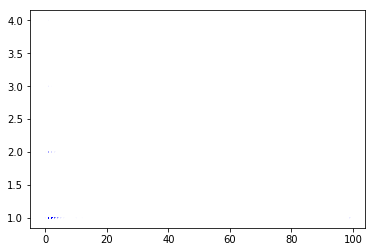

In [38]:
# Question 4 - 
thinkplot.Scatter(jintendn, timesmar, alpha=0.01, s=2, color='Blue')

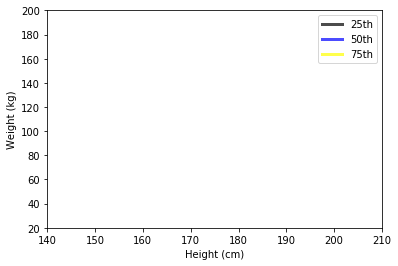

In [39]:
# Question 4
timesmar_cdf = thinkstats2.Cdf(timesmar)

CustomColors = ["black","blue","yellow"]
percent = [25, 50, 75]
for i in range(len(percent)):
    timesmar_percentiles = timesmar_cdf.Percentile(percent[i])
    label = '%dth' % percent[i]
    thinkplot.Plot(timesmar_percentiles, label=label,color=CustomColors[i])
    
thinkplot.Config(xlabel='Height (cm)',
                 ylabel='Weight (kg)',
                 axis=[140, 210, 20, 200],
                 legend=True)

In [36]:
# Question 4
import scipy

scipy.stats.pearsonr(jintendn, timesmar)

(-0.03652346652385939, 0.23171606728546632)

In [37]:
scipy.stats.spearmanr(jintendn, timesmar)

SpearmanrResult(correlation=-0.08337747790348257, pvalue=0.006256598683894427)